# Get the data
Firstly load the dataset from the file "houses_data.csv" (58Mo)

In [56]:
import pandas as pd
df = pd.read_csv("./data/houses_data.csv", encoding= 'unicode_escape')
print(df.columns)

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')


c:\users\donatien\repository\big-data\venv\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (1,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Frame the Problem
Estimating a sale price of a house in Beijing from our dataset. (2011-2017)

The solution will be used from a Web view by filling a form and return the predicted price.

No solutions were found.

We will frame this problem with a supervised method, and it will be online.
We will measure our model thanks to R² score, and the explained-variance score.
The score should not be below 60%.

The performance measure are aligned with the business objective.
The score should be above 90% to complete the business objective.

All housing price estimation problems around the world.
Human expertise is available by expert in housing price estimation.
To solve this problem manually you have to compare all available
data about the house and estimate the price by comparing another local houses' data.

## List of assumptions
Price is varied depending on :
- Latitude
- Longitude
- Price/square
- Number bathroom
- Number leaving-room
- Number kitchen
- Number drawing-room
- the height of floors
- Construction time
- Renovation condition
- Building structure
- Ladder ratio (proportion between nb on the same floor)
- Presence of Elevator
- owner got property of less than 5 years?

We begin our Exploratory data analysis process by removing all the null values that contain in our
dataset by using the "dropna" function.

In [57]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size
df.dropna(inplace = True)

You can print all columns, and their data type by running following cell :

In [58]:
print(df.isnull().sum())

url                    0
id                     0
Lng                    0
Lat                    0
Cid                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64


Now, using the ‘describe’ function we can get a statistical view of the data like mean, median, standard deviation, and so on.

In [59]:
df.describe()

Lng            Lat           Cid            DOM  \
count  159376.000000  159376.000000  1.593760e+05  159376.000000   
mean      116.414945      39.947954  1.138022e+12      28.732469   
std         0.113808       0.094496  1.771455e+12      50.019226   
min       116.072514      39.627030  1.111027e+12       1.000000   
25%       116.343245      39.891739  1.111027e+12       1.000000   
50%       116.416187      39.933840  1.111027e+12       6.000000   
75%       116.476687      40.001544  1.111027e+12      37.000000   
max       116.711337      40.252758  1.184867e+14    1677.000000   

           followers     totalPrice          price         square  \
count  159376.000000  159376.000000  159376.000000  159376.000000   
mean       26.340905     409.017029   51448.336776      82.593615   
std        43.841179     253.833944   24110.664104      36.611204   
min         0.000000       0.100000       1.000000       7.370000   
25%         2.000000     245.000000   33848.000000      57.740000   
50%        12.000000     353.000000   46728.500000      73.640000   
75%        32.000000     500.000000   64517.000000      97.632500   
max      1143.000000    4900.000000  156250.000000     640.000000   

             kitchen   buildingType  renovationCondition  buildingStructure  \
count  159376.000000  159376.000000        159376.000000      159376.000000   
mean        0.991724       3.022663             3.012869           4.465377   
std         0.116957       1.263636             1.149588           1.900514   
min         0.000000       1.000000             1.000000           1.000000   
25%         1.000000       1.000000             3.000000           2.000000   
50%         1.000000       4.000000             3.000000           6.000000   
75%         1.000000       4.000000             4.000000           6.000000   
max         3.000000       4.000000             4.000000           6.000000   

        ladderRatio       elevator  fiveYearsProperty         subway  \
count  1.593760e+05  159376.000000      159376.000000  159376.000000   
mean   6.318427e+01       0.581945           0.609151       0.597581   
std    2.507244e+04       0.493241           0.487942       0.490387   
min    1.400000e-02       0.000000           0.000000       0.000000   
25%    2.500000e-01       0.000000           0.000000       0.000000   
50%    3.330000e-01       1.000000           1.000000       1.000000   
75%    5.000000e-01       1.000000           1.000000       1.000000   
max    1.000940e+07       1.000000           1.000000       1.000000   

            district  communityAverage  
count  159376.000000     159376.000000  
mean        6.703970      63399.898259  
std         2.845518      22333.358050  
min         1.000000      10847.000000  
25%         6.000000      45943.000000  
50%         7.000000      58955.000000  
75%         8.000000      75858.000000  
max        13.000000     183109.000000


# Explore the data

- Our final step in the Exploratory data analysis process is to check the data types of the variables
that are present in our variables. In case if there is any float
or object type variable, we have to convert them into integer type.
- Now, let’s have a look at the data types of the variables
present in our dataset using the ‘dtypes’ function in Python.

In [60]:
print(df.dtypes)

url                     object
id                      object
Lng                    float64
Lat                    float64
Cid                      int64
tradeTime               object
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object


In [61]:
import numpy as np
def convert_to_int(list_to_convert, local_df):
    for string in list_to_convert:
        local_df[string] = pd.to_numeric(df[string], errors = 'coerce')
        local_df[string].fillna(0)
        local_df[string] = df[string].replace(np.nan, 0)
        local_df[string] = df[string].round().astype('int64')

def drop_col(list_drop, df_to_drop):
    for string in list_drop:
        df_to_drop = df_to_drop.drop([string], axis=1)
    return df_to_drop

df.Lat = df.Lat * 1000000
df.Lng = df.Lng * 1000000
df.ladderRatio = df.ladderRatio * 1000
listToInt = ['communityAverage', 'Lng', 'Lat', 'totalPrice', 'square', 'livingRoom',
        'drawingRoom', 'bathRoom', 'ladderRatio', 'buildingType',
        'elevator', 'fiveYearsProperty', 'constructionTime']
listToDrop = ['subway', 'tradeTime', 'DOM', 'followers', 'url', 'floor', "id"]
convert_to_int(listToInt, df)
df = drop_col(listToDrop, df)
print(df.dtypes)

Lng                    int64
Lat                    int64
Cid                    int64
totalPrice             int64
price                  int64
square                 int64
livingRoom             int64
drawingRoom            int64
kitchen                int64
bathRoom               int64
buildingType           int64
constructionTime       int64
renovationCondition    int64
buildingStructure      int64
ladderRatio            int64
elevator               int64
fiveYearsProperty      int64
district               int64
communityAverage       int64
dtype: object


Now all our dataset is in Int64, it makes easier for our models to make prediction.
- We can now create a data report to analyse correlations between all variable.
- With that, our EDA process is over. Our next process is to visualize the data using the dataprep package.
To make it easier we use the show_browser method.

In [62]:
from dataprep.eda import create_report
create_report(df).show_browser()

  0%|          | 0/2937 [00:00<?, ?it/s]

c:\users\donatien\repository\big-data\venv\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


We have finished the Data Visualization process. Our next step is to select and define the dependent variables and the independent variables and split them into a train set and test set.

In [63]:
features = ['square', 'bathRoom', 'livingRoom', 'drawingRoom', 'kitchen', 'renovationCondition', 'buildingStructure', 'elevator', 'communityAverage']

In this process we are going to define the ‘X’ variable (independent variable) and the ‘Y’ variable (dependent variable).
- After defining the variables, we will use them to split the data into a train set and test set. Splitting the data can
be done using the ‘train_test_split’ function provided by scikit-learn in python

In [64]:
from sklearn.model_selection import train_test_split
Y = df.price
X = df[features]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

Now that we have all our required elements to build our models.

So, let’s proceed to our next step which is building the models using scikit-learn in Python.
- To evaluate our model we are going to use the ‘explained_variance_score’ metric, and the ‘r2_score’ metric functions which are provided by the scikit-learn package in Python.
- When it comes to the ‘explained_variance_score’ metric, the score should not below 0.60 or 60%. If it is the case, then our built model is not sufficient for our data to solve the given case. So, the ideal score of the ‘explained_variance_score’ should be between 0.60 and 1.0.
- Our next evaluation metric is the ‘r2_score’ (R-squared) metric. What is R-squared? R-squared is a measurement of how well the dependent variable explains the variance of the independent variable. It is the most popular evaluation metric for regression models.
- The ideal ‘r2_score’ of a build should be more than 0.70 (at least > 0.60).
- mean absolute error
- No cross validation since our dataset is very large

# Model selection

### LINEAR REGRESSION
The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features.
- Linear regression OLS


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

def linear_regression_test():
    global res_df, top_df
    name = 'Linear_regression'
    print(name)
    res_df[name] = pd.DataFrame(columns=['Name', 'MAE', 'R-Squared', 'EVS', 'args'])
    top = {'Name':name, 'MAE':100000, 'R-Squared':0, 'EVS':0, 'args':'n_est:'+str(0)}
    for bo in [True, False]:
        model = LinearRegression(positive=bo)
        model.fit(X_train, Y_train)
        pred = model.predict(X_test)
        mae_data = mae(Y_test, pred)
        r2_data = r2(Y_test, pred)
        evs_data = evs(Y_test, pred)
        res_df[name] = res_df[name].append({'Name': name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':str(bo), 'args_label':'positive'},
                               ignore_index=True)
        if mae_data < top['MAE']:
            top = {'Name':name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':'positive:'+str(bo)}
    top_df = top_df.append({'Name':name, 'MAE':top['MAE'], 'R-Squared':top['R-Squared'], 'EVS':top['EVS'], 'args':top['args']}, ignore_index=True)



- Ridge Algorithm

In [66]:
from sklearn.linear_model import Ridge # Ridge algorithm

def ridge_test():
    global res_df, top_df
    name = 'Ridge'
    print(name)
    res_df[name] = pd.DataFrame(columns=['Name', 'MAE', 'R-Squared', 'EVS', 'args'])
    top = {'Name':name, 'MAE':100000, 'R-Squared':0, 'EVS':0, 'args':'n_est:'+str(0)}
    alpha = 1000000000000
    while alpha != 0.00001:
        alpha /= 10
        model = Ridge(alpha=alpha)
        model.fit(X_train, Y_train)
        pred = model.predict(X_test)
        mae_data = mae(Y_test, pred)
        r2_data = r2(Y_test, pred)
        evs_data = evs(Y_test, pred)
        res_df[name] = res_df[name].append({'Name': name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':np.round(alpha,6), 'args_label':'alpha'},
                               ignore_index=True)
        if mae_data < top['MAE']:
            top = {'Name':name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':'alpha:'+str(np.round(alpha,6))}
    top_df = top_df.append({'Name':name, 'MAE':top['MAE'], 'R-Squared':top['R-Squared'], 'EVS':top['EVS'], 'args':top['args']}, ignore_index=True)



- Lasso Algorithm


In [67]:
from sklearn.linear_model import Lasso # Lasso algorithm

def lasso_test():
    global res_df, top_df
    name = 'Lasso'
    print(name)
    res_df[name] = pd.DataFrame(columns=['Name', 'MAE', 'R-Squared', 'EVS', 'args'])
    top = {'Name':name, 'MAE':100000, 'R-Squared':0, 'EVS':0, 'args':'n_est:'+str(0)}
    alpha = 1000000000
    while alpha != 0.00001:
        alpha /= 10
        model = Lasso(alpha=alpha)
        model.fit(X_train, Y_train)
        pred = model.predict(X_test)
        mae_data = mae(Y_test, pred)
        r2_data = r2(Y_test, pred)
        evs_data = evs(Y_test, pred)
        res_df[name] = res_df[name].append({'Name': name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':np.round(alpha,6), 'args_label':'alpha'},
                               ignore_index=True)
        if mae_data < top['MAE']:
            top = {'Name':name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':'alpha:'+str(np.round(alpha,6))}
    top_df = top_df.append({'Name':name, 'MAE':top['MAE'], 'R-Squared':top['R-Squared'], 'EVS':top['EVS'], 'args':top['args']}, ignore_index=True)


- Bayesian Algorithm


In [68]:
from sklearn.linear_model import BayesianRidge # Bayesian algorithm

def bayesian_test():
    global res_df, top_df
    name = 'Bayesian'
    print(name)
    res_df[name] = pd.DataFrame(columns=['Name', 'MAE', 'R-Squared', 'EVS', 'args'])
    top = {'Name':name, 'MAE':100000, 'R-Squared':0, 'EVS':0, 'args':'n_est:'+str(0)}
    alpha = 1000000000000
    while alpha != 0.00001:
        alpha /= 10
        model = BayesianRidge(alpha_1=alpha)
        model.fit(X_train, Y_train)
        pred = model.predict(X_test)
        mae_data = mae(Y_test, pred)
        r2_data = r2(Y_test, pred)
        evs_data = evs(Y_test, pred)
        res_df[name] = res_df[name].append({'Name': name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':np.round(alpha,6), 'args_label':'alpha'},
                               ignore_index=True)
        if mae_data < top['MAE']:
            top = {'Name':name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':'alpha:'+str(np.round(alpha,6))}
    top_df = top_df.append({'Name':name, 'MAE':top['MAE'], 'R-Squared':top['R-Squared'], 'EVS':top['EVS'], 'args':top['args']}, ignore_index=True)


- ElasticNet Algorithm

In [69]:
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

def elastic_net_test():
    global res_df, top_df
    name = 'Elastic_net'
    print(name)
    res_df[name] = pd.DataFrame(columns=['Name', 'MAE', 'R-Squared', 'EVS', 'args'])
    top = {'Name':name, 'MAE':100000, 'R-Squared':0, 'EVS':0, 'args':'n_est:'+str(0)}
    alpha = 1000000000
    while alpha != 0.00001:
        alpha /= 10
        model = ElasticNet(alpha=alpha, random_state=1)
        model.fit(X_train, Y_train)
        pred = model.predict(X_test)
        mae_data = mae(Y_test, pred)
        r2_data = r2(Y_test, pred)
        evs_data = evs(Y_test, pred)
        res_df[name] = res_df[name].append({'Name': name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':np.round(alpha,6), 'args_label':'alpha'},
                               ignore_index=True)
        if mae_data < top['MAE']:
            top = {'Name':name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':'alpha:'+str(np.round(alpha,6))}
    top_df = top_df.append({'Name':name, 'MAE':top['MAE'], 'R-Squared':top['R-Squared'], 'EVS':top['EVS'], 'args':top['args']}, ignore_index=True)

### TREE REGRESSION
- Decision Tree regression
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [70]:
from sklearn.tree import DecisionTreeRegressor

def decision_tree_test():
    global res_df, top_df
    name = 'Decision_tree'
    print(name)
    res_df[name] = pd.DataFrame(columns=['Name', 'MAE', 'R-Squared', 'EVS', 'args'])
    top = {'Name':name, 'MAE':100000, 'R-Squared':0, 'EVS':0, 'args':'n_est:'+str(0)}
    for max_depth in range(1, 20, 1):
        model = DecisionTreeRegressor(max_depth=max_depth, random_state=1)
        model.fit(X_train, Y_train)
        pred = model.predict(X_test)
        mae_data = mae(Y_test, pred)
        r2_data = r2(Y_test, pred)
        evs_data = evs(Y_test, pred)
        res_df[name] = res_df[name].append({'Name': name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':max_depth, 'args_label':'max_depth'},
                               ignore_index=True)
        if mae_data < top['MAE']:
            top = {'Name':name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':'max_depth:'+str(max_depth)}
    top_df = top_df.append({'Name':name, 'MAE':top['MAE'], 'R-Squared':top['R-Squared'], 'EVS':top['EVS'], 'args':top['args']}, ignore_index=True)

- Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_test():
    global res_df, top_df
    name = 'Random_forest'
    print(name)
    res_df[name] = pd.DataFrame(columns=['Name', 'MAE', 'R-Squared', 'EVS', 'args'])
    top = {'Name':name, 'MAE':100000, 'R-Squared':0, 'EVS':0, 'args':'n_est:'+str(0)}
    for n_est in range(100, 1000, 100):
        model = RandomForestRegressor(n_estimators=n_est, random_state=1)
        model.fit(X_train, Y_train)
        pred = model.predict(X_test)
        mae_data = mae(Y_test, pred)
        r2_data = r2(Y_test, pred)
        evs_data = evs(Y_test, pred)
        res_df[name] = res_df[name].append({'Name': name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':n_est, 'args_label':'n_est'},
                               ignore_index=True)
        if mae_data < top['MAE']:
            top = {'Name':name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':'n_est:'+str(n_est)}
    top_df = top_df.append({'Name':name, 'MAE':top['MAE'], 'R-Squared':top['R-Squared'], 'EVS':top['EVS'], 'args':top['args']}, ignore_index=True)


### Support vector learning
The advantages of support vector machines are:
Effective in high dimensional spaces.
Still effective in cases where number of dimensions is greater than the number of samples.
Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

In [ ]:
#from sklearn import svm
#SVMa = svm.SVR(kernel='linear', C=1)
#SVMa.fit(X_train, Y_train)
#SVMa_pred = SVMa.predict(X_test)
#print('Explained Variance Score of SVM model is {}'.format(evs(Y_test, SVMa_pred), attrs = ['bold']))

### Ensemble methods
The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.
- XGBoost

In [73]:
from xgboost import XGBRegressor

def xgboost_test():
    global res_df, top_df
    name = 'Xgboost'
    print(name)
    res_df[name] = pd.DataFrame(columns=['Name', 'MAE', 'R-Squared', 'EVS', 'args'])
    top = {'Name':name, 'MAE':100000, 'R-Squared':0, 'EVS':0, 'args':'n_est:'+str(0)}
    for n_est in range(50, 1000, 50):
        model = XGBRegressor(n_estimators=n_est)
        model.fit(X_train, Y_train)
        pred = model.predict(X_test)
        mae_data = mae(Y_test, pred)
        r2_data = r2(Y_test, pred)
        evs_data = evs(Y_test, pred)
        res_df[name] = res_df[name].append({'Name': name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':n_est, 'args_label':'n_est'},
                               ignore_index=True)
        if mae_data < top['MAE']:
            top = {'Name':name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':'n_est:'+str(n_est)}
    top_df = top_df.append({'Name':name, 'MAE':top['MAE'], 'R-Squared':top['R-Squared'], 'EVS':top['EVS'], 'args':top['args']}, ignore_index=True)

- AdaBoost

In [74]:
from sklearn.ensemble import AdaBoostRegressor

def ada_test():
    global res_df, top_df
    name = 'Ada'
    print(name)
    res_df[name] = pd.DataFrame(columns=['Name', 'MAE', 'R-Squared', 'EVS', 'args'])
    top = {'Name':name, 'MAE':100000, 'R-Squared':0, 'EVS':0, 'args':'n_est:'+str(0)}
    for n_est in range(100, 1000, 150):
        for max_depth in range(2, 6):
            model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=max_depth), n_estimators=n_est, random_state=1)
            model.fit(X_train, Y_train)
            pred = model.predict(X_test)
            mae_data = mae(Y_test, pred)
            r2_data = r2(Y_test, pred)
            evs_data = evs(Y_test, pred)
            res_df[name] = res_df[name].append({'Name': name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':round(float(str(n_est)+'.'+str(max_depth)), 1), 'args_label':'n_est,decision_tree_max_depth'},
                                   ignore_index=True)
            if mae_data < top['MAE']:
                top = {'Name':name, 'MAE':mae_data, 'R-Squared':r2_data, 'EVS':evs_data, 'args':'n_est'+str(n_est)+';'+'decision_tree_max_depth'+str(max_depth)}
    top_df = top_df.append({'Name':name, 'MAE':top['MAE'], 'R-Squared':top['R-Squared'], 'EVS':top['EVS'], 'args':top['args']}, ignore_index=True)

### Initialization of result dataframes

In [75]:
res_df = {}
top_df = pd.DataFrame(columns=['Name', 'MAE', 'R-Squared', 'EVS', 'args'])


You can select the model you want to test by add comment in the following code the <model>_test methods :
The print will be the current model in processing

In [76]:
import matplotlib.pyplot as plt
from tabulate import tabulate

xgboost_test()
ada_test()
random_forest_test()
decision_tree_test()
elastic_net_test()
bayesian_test()
lasso_test()
ridge_test()
linear_regression_test()

Xgboost
Ada
Random_forest
Decision_tree
Elastic_net
Bayesian
Lasso
Ridge
Linear_regression


Show global result of the test by running the following cell

In the table there is 3 different indicators of results MAE, R² and EVS
The green bar will be the algorithm who make the best result of MAE score

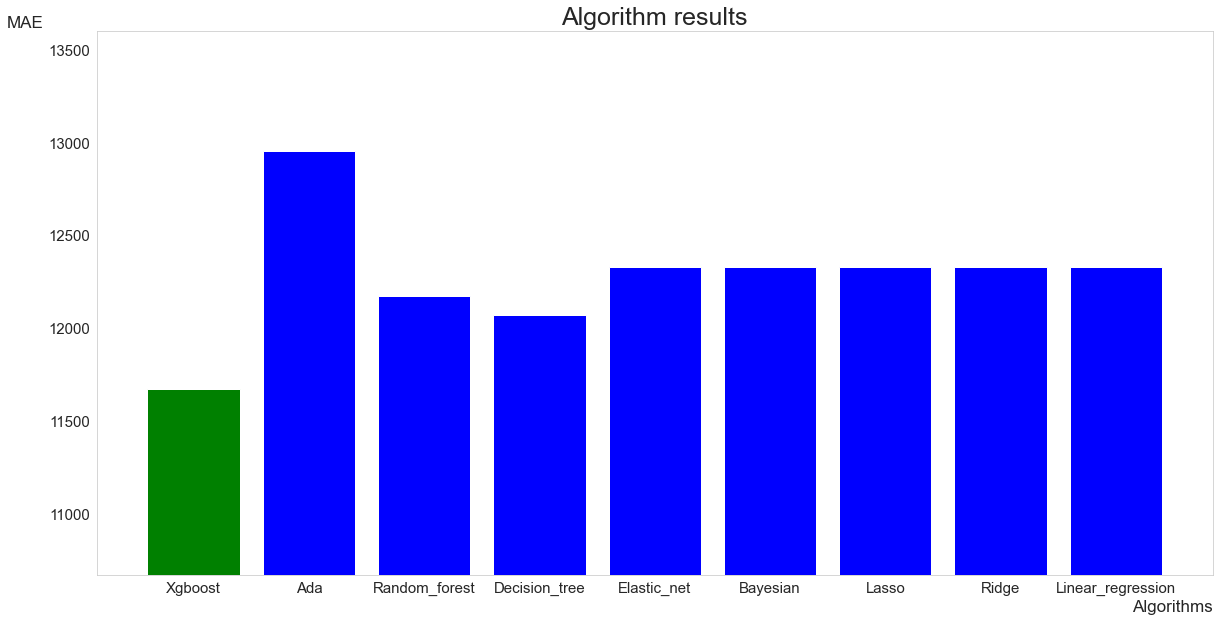

+---+-------------------+--------------------+--------------------+--------------------+-----------------------------------+
|   |       Name        |        MAE         |     R-Squared      |        EVS         |               args                |
+---+-------------------+--------------------+--------------------+--------------------+-----------------------------------+
| 0 |      Xgboost      | 11675.511640355884 | 0.6160594120057299 | 0.6160897324247673 |             n_est:500             |
| 1 |        Ada        | 12955.051411509217 | 0.5668415989701745 | 0.5773091973459458 | n_est100;decision_tree_max_depth4 |
| 2 |   Random_forest   | 12173.386915725125 | 0.5666114000197382 | 0.5666719991910445 |             n_est:900             |
| 3 |   Decision_tree   | 12072.884688930328 | 0.6006012084606664 | 0.6006218543919735 |            max_depth:9            |
| 4 |    Elastic_net    | 12334.438092589031 | 0.5908814388668655 | 0.5909135228222717 |            alpha:1e-05            |


In [77]:
minvalueIndexLabel = top_df['MAE'].idxmin()
colors = ['b'] * len(top_df['MAE'])
colors[minvalueIndexLabel] = 'g'
plt.grid(False)
plt.title('Algorithm results', fontsize=25)
plt.bar(top_df.Name, top_df.MAE, color=colors)
plt.ylim(bottom=top_df['MAE'].min() - 1000)
plt.xlabel('Algorithms', loc='right', fontsize=17)
plt.ylabel('MAE',rotation=0, loc='top', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print(tabulate(top_df, headers="keys", tablefmt="pretty"))

The following cell show a diagram per tested models, in these diagram there is the MAE of each test
The green bar is the best test.
the X axis represent tested parameters

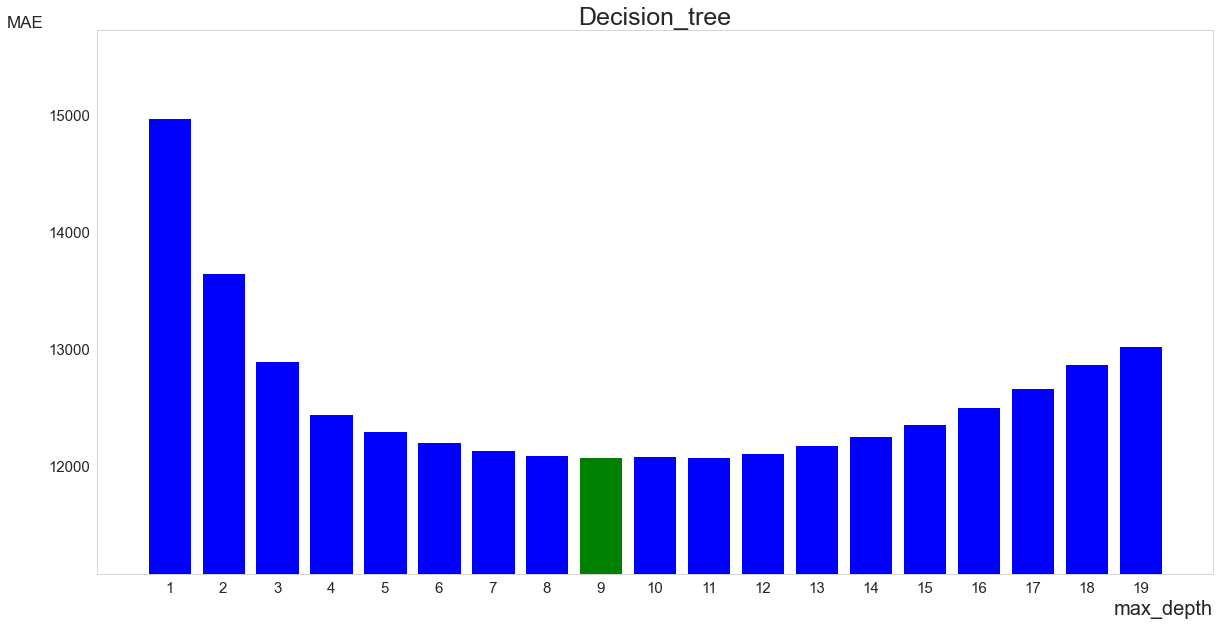

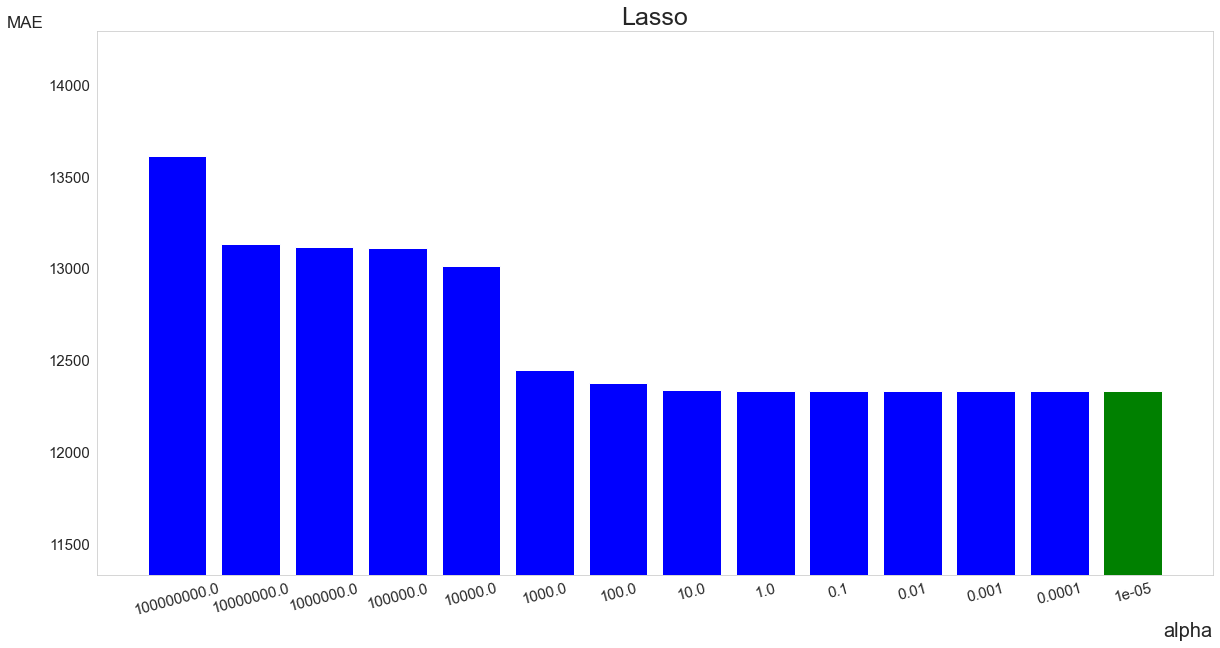

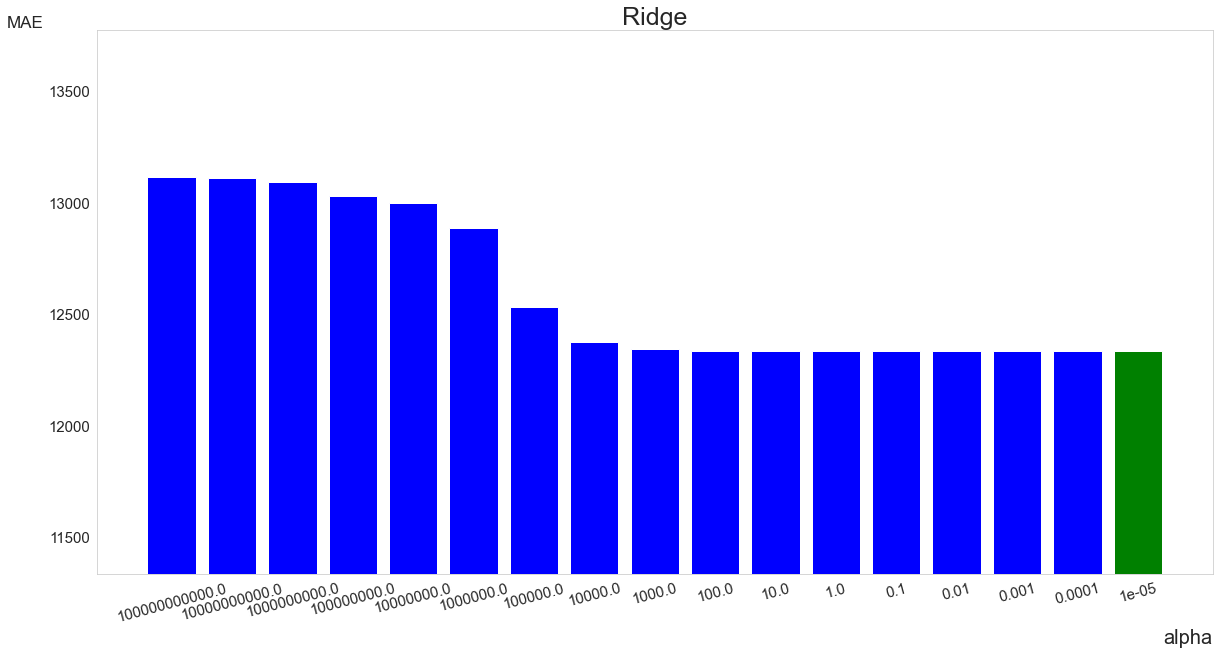

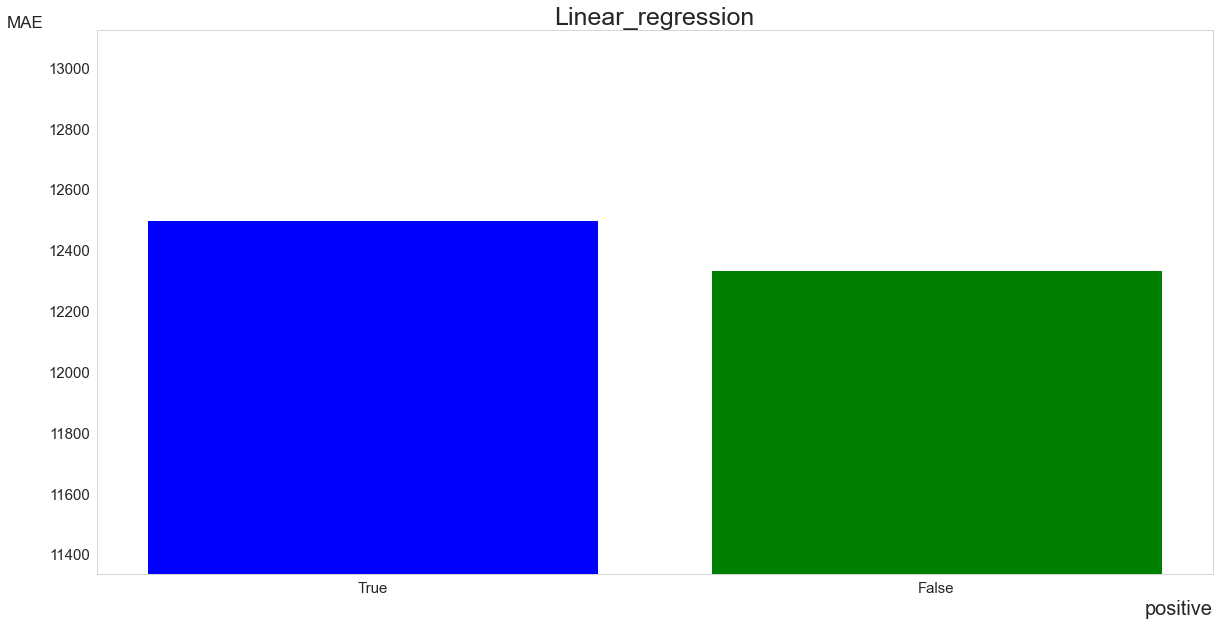

In [78]:
import matplotlib.pyplot as plt

names = ['Xgboost', 'Ada', 'Random_forest', 'Decision_tree', 'Elastic_net', 'Bayesian' , 'Lasso', 'Ridge', 'Linear_regression']
for n in names:
    try:
        minvalueIndexLabel = res_df[n]['MAE'].idxmin()
        colors = ['b'] * len(res_df[n])
        colors[minvalueIndexLabel] = 'g'
        plt.title(n, fontsize=25)
        plt.grid(False)
        xi = list(range(len(res_df[n].args)))
        if n != 'Ada' and n != 'Xgboost' and n != 'Random_forest' and n != 'Decision_tree' and n != 'Linear_regression':
            plt.xticks(xi, res_df[n].args, rotation=15,fontsize=15)
        else:
            plt.xticks(xi, res_df[n].args, fontsize=15)
        plt.bar(xi, res_df[n].MAE, color=colors)
        plt.xlabel(res_df[n].args_label[0],rotation=0, loc='right', fontsize=20)
        plt.ylabel('MAE',rotation=0, loc='top', fontsize=17)
        plt.ylim(bottom=res_df[n]['MAE'].min() - 1000)
        plt.yticks(fontsize=15)
        plt.show()
    except:
        pass

You can print all detailed test (MAE, R² and EVS) in a table by running following cell (Optional)

In [82]:
for test in res_df.values():
    print(tabulate(test, headers="keys", tablefmt="pretty"))

+----+---------+--------------------+--------------------+--------------------+------+------------+
|    |  Name   |        MAE         |     R-Squared      |        EVS         | args | args_label |
+----+---------+--------------------+--------------------+--------------------+------+------------+
| 0  | Xgboost | 11901.41394828503  | 0.6153941017641782 | 0.6154229318255812 |  50  |   n_est    |
| 1  | Xgboost | 11827.824530451475 | 0.6182890971287048 | 0.6183182311015144 | 100  |   n_est    |
| 2  | Xgboost | 11763.25439382047  | 0.6204175891625181 | 0.6204477139008447 | 150  |   n_est    |
| 3  | Xgboost | 11734.626398152992 | 0.6202148604805688 | 0.6202462738437753 | 200  |   n_est    |
| 4  | Xgboost | 11730.998457301346 | 0.6190848346379083 | 0.6191146739323596 | 250  |   n_est    |
| 5  | Xgboost | 11706.294415334061 | 0.6192176164380754 | 0.619246646437496  | 300  |   n_est    |
| 6  | Xgboost | 11695.747849890942 | 0.6184899457760813 | 0.6185220294392231 | 350  |   n_est    |
